## Anotaciones

* _holiday_ incluye a _shops closed_
* trabajar con la fecha
* Ver los fin de semanas
* Cuantos días pasaron desde el ultimo feriado y cuanto falta para el siguiente (?)
* Ver outliers en los feriados (o en los días)
* Maximos y minimos en los user_activities
* Diferenciar por pais

## Carga de librerías

In [462]:
# Probar con arbol con poda
# Probar con arbol sin poda pero corto
# Probar voting
# Probar varios KFolds en el de stacking

#Agregamos librerias a utilizar
import keras as keras
import pandas as pd
import xgboost as xgb
# import sklearn as sk
import numpy as np
from datetime import datetime

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#modelos y métricas
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split, cross_validate
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from catboost import CatBoostRegressor, Pool
from sklearn.ensemble import StackingRegressor,RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
pd.set_option('display.max_columns', 40)

# import warnings
# warnings.simplefilter("ignore")

## Visualización de datos

In [463]:
# Generamos un dataframe del dataset de entrenamiento
df =  pd.read_csv('train.csv')
df

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1722.0,32575.0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1688.0,32507.0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1696.0,32552.0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,0,0,0,0.0,0,0.80,0.0,1681.0,32423.0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,0,0,0,0.0,0,0.50,0.0,1704.0,32410.0,Prague_1_2020-12-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,Budapest_1,2024-03-10,6733.0,NaN,0,0,0,0,0,0,0,0.0,0,1.51,0.0,2983.0,27111.0,Budapest_1_2024-03-10
7336,Budapest_1,2024-03-11,6492.0,NaN,0,0,0,0,0,0,0,0.0,0,1.03,0.0,2975.0,27133.0,Budapest_1_2024-03-11
7337,Budapest_1,2024-03-12,6661.0,NaN,0,0,0,0,0,0,0,0.0,0,0.21,0.0,2974.0,27151.0,Budapest_1_2024-03-12
7338,Budapest_1,2024-03-13,6843.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,2979.0,27180.0,Budapest_1_2024-03-13


In [464]:
df.warehouse.value_counts()

warehouse
Prague_1       1193
Brno_1         1193
Prague_2       1193
Prague_3       1193
Budapest_1     1154
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

### Primeros vistazos al dataset original

In [465]:
print(f"El maximo de numero de ordenes en un dia es: {df.orders.max()}")

El maximo de numero de ordenes en un dia es: 18139.0


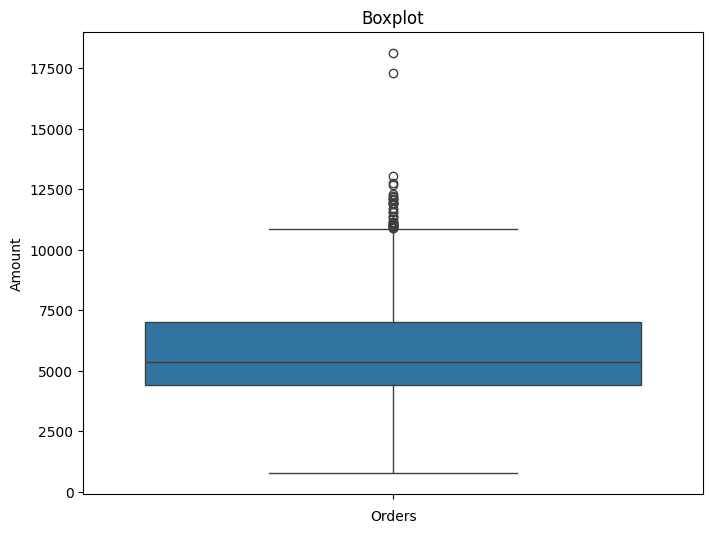

In [466]:
# Boxplot de la cantidad de apariciones de cada numero de ordenes por dia

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

In [467]:
df.count()

warehouse                 7340
date                      7340
orders                    7340
holiday_name               218
holiday                   7340
shutdown                  7340
mini_shutdown             7340
shops_closed              7340
winter_school_holidays    7340
school_holidays           7340
blackout                  7340
mov_change                7340
frankfurt_shutdown        7340
precipitation             7070
snow                      7070
user_activity_1           7340
user_activity_2           7340
id                        7340
dtype: int64

In [468]:
df.warehouse.value_counts()

warehouse
Prague_1       1193
Brno_1         1193
Prague_2       1193
Prague_3       1193
Budapest_1     1154
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

In [469]:
df.shops_closed.value_counts()

shops_closed
0    7260
1      80
Name: count, dtype: int64

In [470]:
df[df.warehouse == 'Frankfurt_1'].count()

warehouse                 629
date                      629
orders                    629
holiday_name                6
holiday                   629
shutdown                  629
mini_shutdown             629
shops_closed              629
winter_school_holidays    629
school_holidays           629
blackout                  629
mov_change                629
frankfurt_shutdown        629
precipitation             626
snow                      626
user_activity_1           629
user_activity_2           629
id                        629
dtype: int64

In [471]:
df.frankfurt_shutdown.value_counts()

frankfurt_shutdown
0    7338
1       2
Name: count, dtype: int64

Podemos ver que de las 7340 muestras que tenemos disponibles, solo dos tienen positivo en la columna frankfurt_shutdown, lo que significa que muy posiblemente no tenga relevancia en la variable target y que sera de poca utilidad para el entrenamiento de los modelos predictores.

### Visualizaciones de variaciones del dataset

Para poder obtener mayor información -más precisa y más útil- respecto de los datos disponibles debemos hacer modificaciones al dataset que nos permitan estudiarlo mejor.

#### Dataset limpio (para testear)

La primera modificación tiene que ver con las variables que no se encuentran en el dataset de test. Estas hay que quitarlas para así entrenar modelos con únicamente con las mismas variables que luego se encuentren en el dataset de test. Entonces usaremos este nuevo datagram para visualizar datos y para entrenar a los modelos.

In [472]:
df_clean = df.drop(columns=["shutdown", "mini_shutdown", "frankfurt_shutdown", "precipitation", "snow", "user_activity_1", "user_activity_2", "blackout", "mov_change", "id"])
df_clean.head(5)

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0


Mostramos la correlacion entre las variables numericas y el numero de ordenes por día y sucursal. Para eso debemos quitar todas las variables no númericas

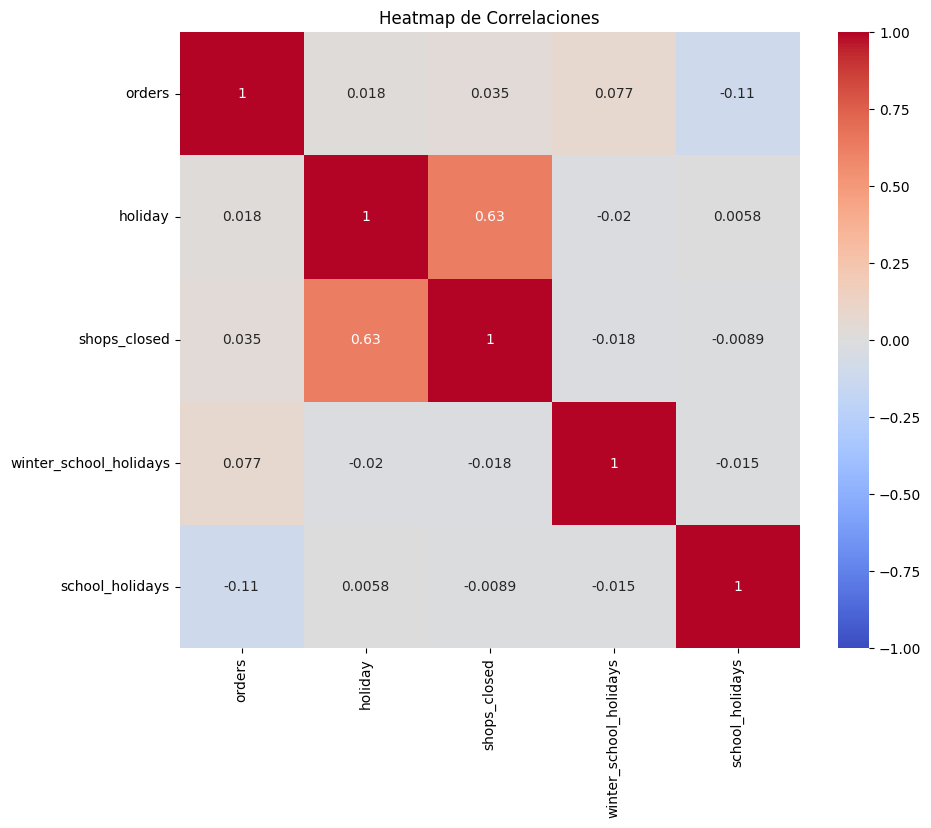

In [473]:
df_clean_numeric = df_clean.drop(columns=['warehouse', 'date', 'holiday_name'])

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

#### Dataset de (no) feriados

Otra distinción que tenemos es la de separar los días en si fueron feriado/vacaciones o no.

In [474]:
# Dividimos el dataset en los que son feriados/vacaciones y en los que no
df_holiday = df[df.holiday == 1]
df_no_holiday = df[df.holiday == 0]

Mostramos el Boxplot de cada uno

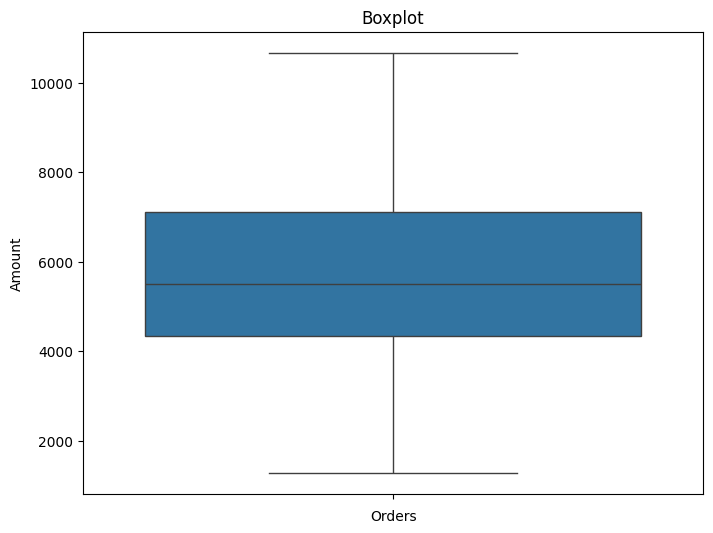

In [475]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df_holiday)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

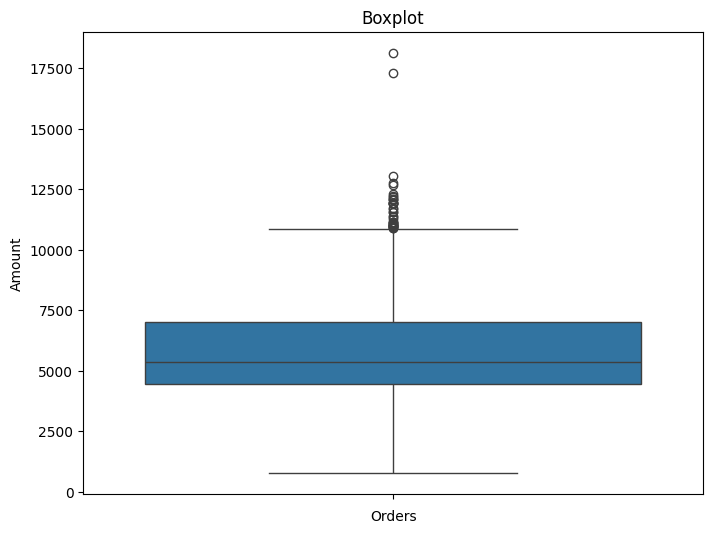

In [476]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df_no_holiday)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

#### Dataset de sucursales

Claramente la sucursal es un factor determinante en las muestras. Queremos ver que tanta correlacion tiene cada sucursal respecto al valor de la variable target. Para eso hacemos variables dummies con la columna warehouse y hacemos un heatmap de correlaciones.

In [477]:
df_warehouses = df_clean.drop(columns=["holiday", "holiday_name", 'date', "shops_closed", "school_holidays", "winter_school_holidays"])

# Primero agregamos las variables de las actividades de usuario para ver su correlacion

# user activity 1
df_usact1 = df[["user_activity_1"]]
df_usact1[["warehouse"]] = df_warehouses[["warehouse"]]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].mean().reset_index()
df_warehouses["user_activity_1"] = pd.merge(df_warehouses, df_usact1, on="warehouse", how="inner")["user_activity_1"]

# user activity 2
df_usact2 = df[["user_activity_2"]]
df_usact2[["warehouse"]] = df_warehouses[["warehouse"]]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].mean().reset_index()
df_warehouses["user_activity_2"] = pd.merge(df_warehouses, df_usact2, on="warehouse", how="inner")["user_activity_2"]
df_warehouses[["user_activity_1", "user_activity_2"]]

/tmp/ipykernel_12072/4236548369.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usact1[["warehouse"]] = df_warehouses[["warehouse"]]
/tmp/ipykernel_12072/4236548369.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usact2[["warehouse"]] = df_warehouses[["warehouse"]]


,user_activity_1,user_activity_2
0,1671.156748,36898.751048
1,1671.156748,36898.751048
2,1671.156748,36898.751048
3,1671.156748,36898.751048
4,1671.156748,36898.751048
...,...,...
7335,2989.061525,22173.545927
7336,2989.061525,22173.545927
7337,2989.061525,22173.545927
7338,2989.061525,22173.545927


In [478]:
# Reemplazamos warehouse por sus variables dummies a la vez que quitamos el resto de variables
df_warehouses = pd.concat([df_warehouses.drop(["warehouse"], axis=1), pd.get_dummies(df_warehouses.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
df_warehouses

,orders,user_activity_1,user_activity_2,warehouse_Brno_1,warehouse_Budapest_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,warehouse_Prague_2,warehouse_Prague_3
0,6895.0,1671.156748,36898.751048,0,0,0,0,1,0,0
1,6584.0,1671.156748,36898.751048,0,0,0,0,1,0,0
2,7030.0,1671.156748,36898.751048,0,0,0,0,1,0,0
3,6550.0,1671.156748,36898.751048,0,0,0,0,1,0,0
4,6910.0,1671.156748,36898.751048,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7335,6733.0,2989.061525,22173.545927,0,1,0,0,0,0,0
7336,6492.0,2989.061525,22173.545927,0,1,0,0,0,0,0
7337,6661.0,2989.061525,22173.545927,0,1,0,0,0,0,0
7338,6843.0,2989.061525,22173.545927,0,1,0,0,0,0,0


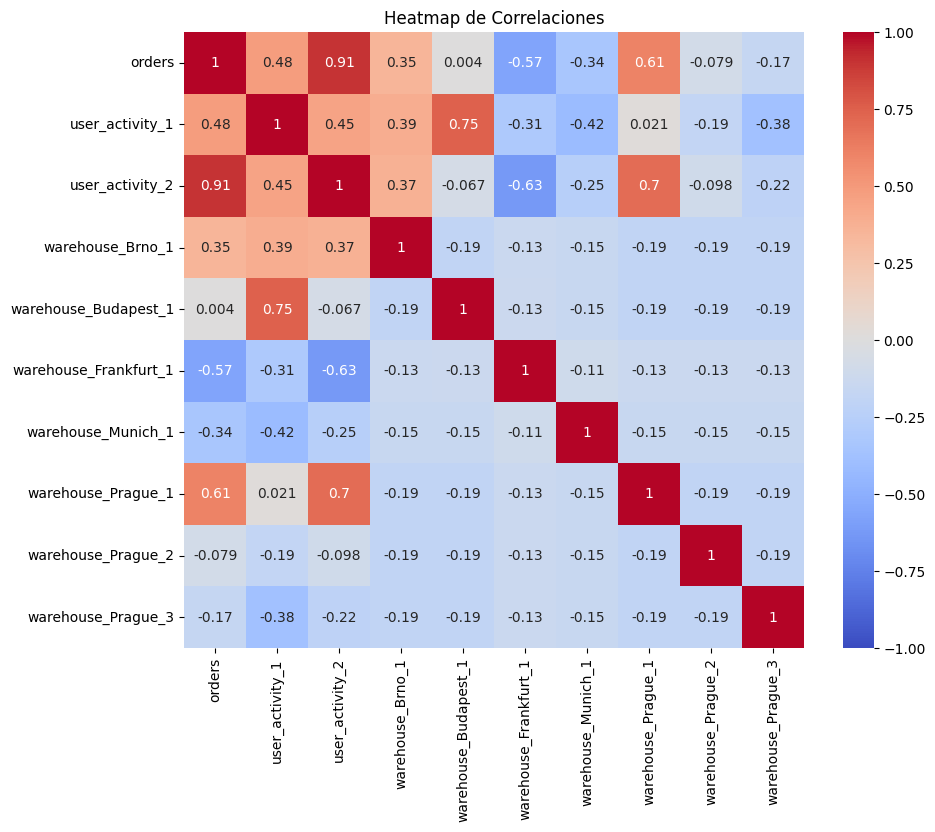

In [479]:
# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_warehouses.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

Notamos que hay mucha correlación entre las sucursales menos en tres (_warehouse Budapest 1_,  _warehouse Prague 2_ y _warehouse Prague 3_), por lo tanto dejamos esas variables como _other_

In [480]:
df_clean["warehouse"] = df_clean["warehouse"].apply(lambda x : "other" if x in ["Budapest_1", "Prague_2", "Prague_3"] else x)
df_clean.warehouse.value_counts()

warehouse
other          3540
Prague_1       1193
Brno_1         1193
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

#### Dataset dias de la semana

Así como debe haber diferencia entre la cantidad de pedidos por día y sucursales en los días feriados y en los no feriados, también debe haberlo entre los días de la semana.

In [481]:
orders_per_weekday = {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, "Saturday": 0, "Sunday": 0}
counts_per_weekday = {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, "Saturday": 0, "Sunday": 0}
orders_per_mounth = {"January": 0, "February": 0, "March": 0, "April": 0, "May": 0, "June": 0, "July": 0, "August": 0, "September": 0, "October": 0, "November": 0, "December": 0}
counts_per_mounth = {"January": 0, "February": 0, "March": 0, "April": 0, "May": 0, "June": 0, "July": 0, "August": 0, "September": 0, "October": 0, "November": 0, "December": 0}

def sum_orders_by_date(row):
    # pasar la fecha a datetime de pandas
    date = datetime.strptime(row["date"], "%Y-%m-%d")
    # tomar el dia de semana que cayo la fecha
    weekday = date.strftime("%A")
    mounth = date.strftime("%B")
    # sumar el numero de ordenes al dia de semana
    orders_per_weekday[weekday] += int(row["orders"])
    counts_per_weekday[weekday] += 1
    orders_per_mounth[mounth] += int(row["orders"])
    counts_per_mounth[mounth] += 1
    

df.apply(sum_orders_by_date, axis=1)

print(orders_per_weekday)
print(counts_per_weekday)
print(orders_per_mounth)
print(counts_per_mounth)

{'Monday': 5755543, 'Tuesday': 5739699, 'Wednesday': 5760388, 'Thursday': 5890880, 'Friday': 6488411, 'Saturday': 5934540, 'Sunday': 5060697}
{'Monday': 1060, 'Tuesday': 1085, 'Wednesday': 1094, 'Thursday': 1089, 'Friday': 1085, 'Saturday': 1085, 'Sunday': 842}
{'January': 4396433, 'February': 4099071, 'March': 3806561, 'April': 2984340, 'May': 2997021, 'June': 2837141, 'July': 2804372, 'August': 2870946, 'September': 3017584, 'October': 3234653, 'November': 3318637, 'December': 4263399}
{'January': 742, 'February': 694, 'March': 670, 'April': 535, 'May': 556, 'June': 546, 'July': 574, 'August': 580, 'September': 580, 'October': 587, 'November': 574, 'December': 702}


In [482]:
# Crear un DataFrame a partir de los diccionarios
weekdays = [weekday[0:3] for weekday in orders_per_weekday.keys()]
mean_per_weekday = [orders_per_weekday[weekday] / counts_per_weekday[weekday] for weekday in orders_per_weekday.keys()]
mounths = [mounth[0:3] for mounth in orders_per_mounth.keys()]
mean_per_mounth = [orders_per_mounth[mounth] / counts_per_mounth[mounth] for mounth in orders_per_mounth.keys()]

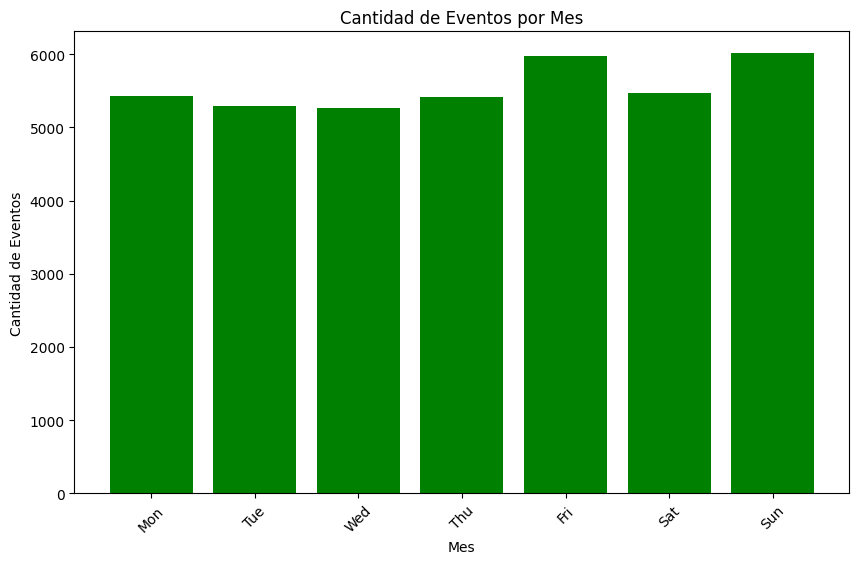

In [483]:
plt.figure(figsize=(10, 6))
plt.bar(weekdays, mean_per_weekday, color='green')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Eventos')
plt.title('Cantidad de Eventos por Mes')
plt.xticks(rotation=45)
plt.show()

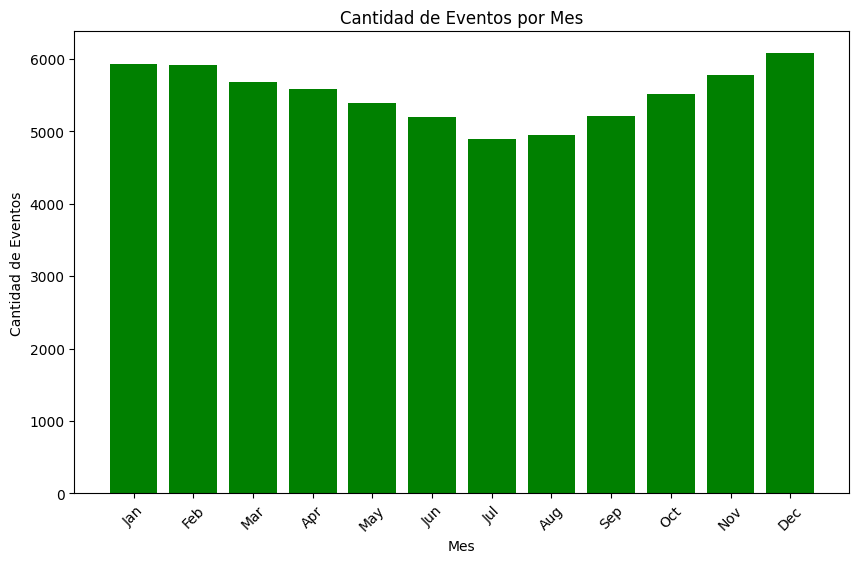

In [484]:
plt.figure(figsize=(10, 6))
plt.bar(mounths, mean_per_mounth, color='green')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Eventos')
plt.title('Cantidad de Eventos por Mes')
plt.xticks(rotation=45)
plt.show()

In [485]:
df_season = df_clean.copy()
df_season['fecha'] = pd.to_datetime(df['date'])

In [486]:
df_season["Season"] = df_season.fecha.dt.month_name()

In [487]:
def get_season(fecha):
    if fecha in ['December', 'January', 'February']:
        return 'Invierno'
    elif fecha in ['March', 'April', 'May']:
        return 'Primavera'
    elif fecha in ['June', 'July', 'August']:
        return 'Verano'
    elif fecha in ['September', 'October', 'November']:
        return 'Otoño'

In [488]:
df_season['Season'] = df_season.Season.apply(get_season)

In [489]:
df_seasons = pd.concat([df_clean['orders'], pd.get_dummies(df_season.Season).astype('int').add_prefix('Season_')], axis=1)

In [490]:
df_seasons

,orders,Season_Invierno,Season_Otoño,Season_Primavera,Season_Verano
0,6895.0,1,0,0,0
1,6584.0,1,0,0,0
2,7030.0,1,0,0,0
3,6550.0,1,0,0,0
4,6910.0,1,0,0,0
...,...,...,...,...,...
7335,6733.0,0,0,1,0
7336,6492.0,0,0,1,0
7337,6661.0,0,0,1,0
7338,6843.0,0,0,1,0


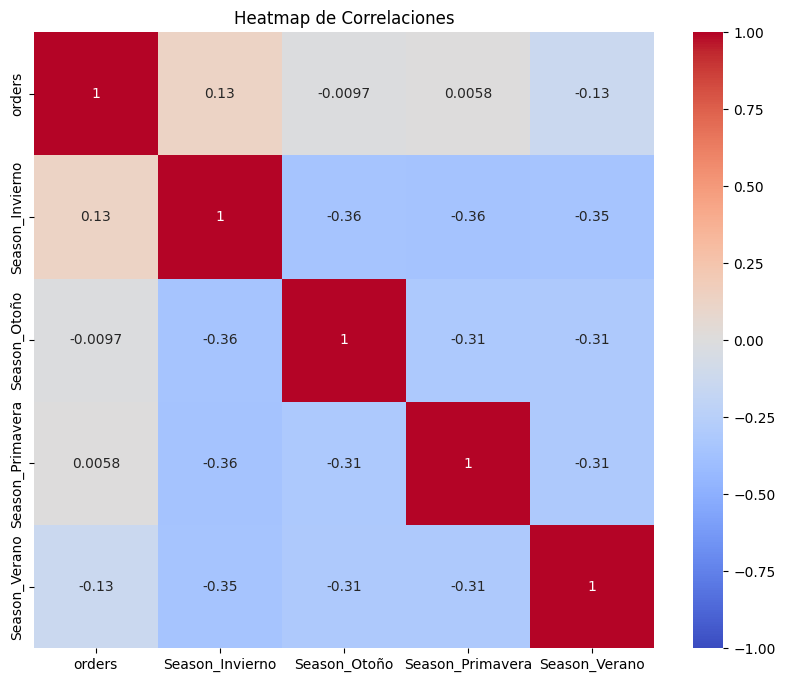

In [491]:
# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_seasons.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

In [492]:
df_season['Hot'] = df_season.Season.apply(lambda x: 1 if x in ['Verano', 'Primera'] else 0)

In [493]:
df_season

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,fecha,Season,Hot
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,2020-12-05,Invierno,0
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,2020-12-06,Invierno,0
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,2020-12-07,Invierno,0
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,2020-12-08,Invierno,0
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,2020-12-09,Invierno,0
...,...,...,...,...,...,...,...,...,...,...,...
7335,other,2024-03-10,6733.0,NaN,0,0,0,0,2024-03-10,Primavera,0
7336,other,2024-03-11,6492.0,NaN,0,0,0,0,2024-03-11,Primavera,0
7337,other,2024-03-12,6661.0,NaN,0,0,0,0,2024-03-12,Primavera,0
7338,other,2024-03-13,6843.0,NaN,0,0,0,0,2024-03-13,Primavera,0


In [494]:
df_season.orders.corr(df_season.Hot)

-0.13284735461473166

In [495]:
df[['orders', 'snow', 'precipitation']].corr()

,orders,snow,precipitation
orders,1.000000,0.093424,0.030428
snow,0.093424,1.000000,0.065120
precipitation,0.030428,0.065120,1.000000


In [496]:
df[['orders', 'holiday', 'mov_change']].corr()

,orders,holiday,mov_change
orders,1.000000,0.018006,-0.040215
holiday,0.018006,1.000000,0.014483
mov_change,-0.040215,0.014483,1.000000


## Conclusiones

- Nos vamos con Warehouse importantes: warehouse_Brno_1, warehouse_Budapest_1, warehouse_Frankfurt_1, warehouse_Munich_1, warehouse_Prague_1, warehouse_Prague_2	y warehouse_Prague_3
- User activities mucha correlación
- Promedio de User activities por warehouse
- Si la fecha pertenece a temporada de calor. En invierno se encuentran valores mas altos
- School holiday tiene correlacion ""alta"" y holidays no

Columnas finales:
- warehouse_Brno-1 (binaria)
- warehouse_Budapest_1 (binaria)
- warehouse_Frankfurt_1 (bianria)
- warehouse_Munich_1 (binaria)
- warehouse_Prague_1 (binaria)
- warehouse_Prague_2 (binaria)
- warehouse_Prague_3 (binaria)
- Promedio user activities por warehouse (numerica)
- school holiday (binaria)
- Hot season (binaria)

## Feature Engineer

In [497]:
df_final = df.drop(["shutdown", "mini_shutdown", "frankfurt_shutdown", "precipitation", "snow", "blackout", "mov_change", 'id'], axis = 1)
df_final

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,user_activity_1,user_activity_2
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,1722.0,32575.0
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,1688.0,32507.0
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,1696.0,32552.0
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,1681.0,32423.0
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,1704.0,32410.0
...,...,...,...,...,...,...,...,...,...,...
7335,Budapest_1,2024-03-10,6733.0,NaN,0,0,0,0,2983.0,27111.0
7336,Budapest_1,2024-03-11,6492.0,NaN,0,0,0,0,2975.0,27133.0
7337,Budapest_1,2024-03-12,6661.0,NaN,0,0,0,0,2974.0,27151.0
7338,Budapest_1,2024-03-13,6843.0,NaN,0,0,0,0,2979.0,27180.0


In [498]:
df_final['date'] = pd.to_datetime(df_final['date'])

In [499]:
df_final = df_final.sort_values(by = "date")

In [500]:
df_final_label = df_final.orders
df_final = df_final.drop(["orders"], axis=1)

# Separando el DataFrame en 80% y 20%
x_train, x_val, y_train, y_val = train_test_split(df_final,
                                                    df_final_label, 
                                                    test_size=0.2,
                                                    shuffle=False)

x_train = x_train.reset_index().drop(["index"], axis = 1)
x_val = x_val.reset_index().drop(["index"], axis = 1)
y_train = y_train.reset_index().drop(["index"], axis = 1)
y_val = y_val.reset_index().drop(["index"], axis = 1)

In [501]:
warehouses = x_train.warehouse

In [502]:
# mean user activity 1
df_usact1 = x_train[["user_activity_1", 'warehouse']]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].mean()
means_ua1= df_usact1.to_dict()

PROMEDIO_UA1 = df_usact1.mean()

# max user activity 1
df_usact1 = x_train[["user_activity_1", 'warehouse']]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].max()
max_ua1= df_usact1.to_dict()

# min user activity 1
df_usact1 = x_train[["user_activity_1", 'warehouse']]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].min()
min_ua1= df_usact1.to_dict()

In [503]:
# user activity 2
df_usact2 = x_train[["user_activity_2", 'warehouse']]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].mean()
PROMEDIO_UA2 = df_usact1.mean()
means_ua2= df_usact2.to_dict()

# max user activity 1
df_usact2 = x_train[["user_activity_2", 'warehouse']]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].max()
max_ua2= df_usact2.to_dict()

# min user activity 1
df_usact2 = x_train[["user_activity_2", 'warehouse']]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].min()
min_ua2= df_usact2.to_dict()

In [504]:
df_mean_encoding_warehouse = pd.concat([x_train, y_train], axis = 1)[["orders", 'warehouse']]
df_mean_encoding_warehouse = df_mean_encoding_warehouse.groupby("warehouse")["orders"].mean()
PROMEDIO_OPW = df_mean_encoding_warehouse.mean()
means_orders_per_warehouse= df_mean_encoding_warehouse.to_dict()

In [505]:
x_train

,warehouse,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,user_activity_1,user_activity_2
0,Prague_1,2020-12-05,NaN,0,0,0,0,1722.0,32575.0
1,Prague_2,2020-12-05,NaN,0,0,0,0,1317.0,18462.0
2,Prague_3,2020-12-05,NaN,0,0,0,0,964.0,17693.0
3,Budapest_1,2020-12-05,NaN,0,0,0,0,3046.0,17840.0
4,Brno_1,2020-12-05,NaN,0,0,0,0,2332.0,27392.0
...,...,...,...,...,...,...,...,...,...
5867,Prague_1,2023-08-06,NaN,0,0,0,0,1657.0,36209.0
5868,Budapest_1,2023-08-06,NaN,0,0,0,0,2962.0,22432.0
5869,Prague_2,2023-08-06,NaN,0,0,0,0,1287.0,21491.0
5870,Prague_3,2023-08-07,NaN,0,0,0,0,950.0,19482.0


In [506]:
x_train['year_month_warehouse'] = x_train['date'].dt.month.astype(str) + '_' + x_train['warehouse']
df_mean_encoding_year_month_warehouse = pd.concat([x_train, y_train], axis = 1)[["orders", 'year_month_warehouse']]
df_mean_encoding_year_month_warehouse = df_mean_encoding_year_month_warehouse.groupby('year_month_warehouse')["orders"].mean()
PROMEDIO_YMW = df_mean_encoding_year_month_warehouse.mean()
means_y_m_w= df_mean_encoding_year_month_warehouse.to_dict()

In [507]:
means_orders_per_warehouse

{'Brno_1': 7009.977366255144,
 'Budapest_1': 5362.533546325879,
 'Frankfurt_1': 1409.5226244343892,
 'Munich_1': 2901.62292358804,
 'Prague_1': 8261.953703703704,
 'Prague_2': 4982.338477366256,
 'Prague_3': 4576.63309352518}

In [508]:
# #Features relacionadas con la user activity
x_train["mean_user_activity_1"] = x_train.warehouse.apply(lambda x: means_ua1.get(x, PROMEDIO_UA1))
x_train["mean_user_activity_2"] = x_train.warehouse.apply(lambda x: means_ua2.get(x, PROMEDIO_UA2))
x_train["max_user_activity_1"] = x_train.warehouse.apply(lambda x: max_ua1.get(x, PROMEDIO_UA1))
x_train["max_user_activity_2"] = x_train.warehouse.apply(lambda x: max_ua2.get(x, PROMEDIO_UA2))
x_train["min_user_activity_1"] = x_train.warehouse.apply(lambda x: min_ua1.get(x, PROMEDIO_UA1))
x_train["min_user_activity_2"] = x_train.warehouse.apply(lambda x: min_ua2.get(x, PROMEDIO_UA2))
x_train["product_ua"] = x_train["mean_user_activity_1"] * x_train["mean_user_activity_2"]


#Mean encoding
x_train["mean_orders_per_warehouse"] = x_train.warehouse.apply(lambda x: means_orders_per_warehouse.get(x, PROMEDIO_OPW))
x_train['year_month_warehouse'] = x_train['date'].dt.month.astype(str) + '_' + x_train['warehouse']
x_train["means_year_month_warehouse"] = x_train.year_month_warehouse.apply(lambda x: means_y_m_w.get(x, PROMEDIO_YMW))

city_to_country = {
    'Munich_1': 'Germany',
    'Frankfurt_1': 'Germany',
    'Budapest_1': 'Hungary',
    'Brno_1': 'Czech Republic',
    'Prague_1': 'Czech Republic',
    'Prague_2': 'Czech Republic',
    'Prague_3': 'Czech Republic'
}

#Countries and warehouses
x_train['country'] = x_train['warehouse'].map(city_to_country)
x_train = pd.concat([x_train.drop(["country"], axis=1), pd.get_dummies(x_train.country).astype('int').add_prefix('country_')], axis=1)
x_train = pd.concat([x_train.drop(["warehouse"], axis=1), pd.get_dummies(x_train.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
x_train = x_train.drop(["warehouse_Budapest_1", "warehouse_Prague_2", "warehouse_Prague_3"], axis=1)
x_train['hot_season'] = x_train.date.apply(lambda x: 1 if 2 < x.month < 9 else 0)

#Time
x_train['year'] = x_train['date'].dt.year
x_train['month'] = x_train['date'].dt.month
x_train['week'] = x_train['date'].dt.isocalendar().week
x_train['day'] = x_train['date'].dt.day
x_train['day_of_week'] = x_train['date'].dt.dayofweek #numero
# x_train['day_of_week'] = x_train['date'].dt.day_name() #cadena
x_train['year_sin'] = np.sin(2 * np.pi * x_train['year'])
#x_train['year_cos'] = np.cos(2 * np.pi * x_train['year'])
#x_train['month_sin'] = np.sin(2 * np.pi * x_train['month'] / 12) 
x_train['month_cos'] = np.cos(2 * np.pi * x_train['month'] / 12)
#x_train['week_sin'] = np.sin(2 * np.pi * x_train['week'] / 53)
x_train['week_cos'] = np.cos(2 * np.pi * x_train['week'] / 53)
#x_train['day_sin'] = np.sin(2 * np.pi * x_train['day'] / 31)
#x_train['day_cos'] = np.cos(2 * np.pi * x_train['day'] / 31)
#x_train['day_of_week_sin'] = np.sin(2 * np.pi * x_train['day_of_week'] / 7)
#x_train['day_of_week_cos'] = np.cos(2 * np.pi * x_train['day_of_week'] / 7)
x_train["month_name"] = x_train.date.dt.month_name()
x_train['season'] = x_train.month_name.apply(get_season)
x_train = pd.concat([x_train, pd.get_dummies(x_train.season).astype('int').add_prefix('Season_')], axis=1)
x_train['group']=(x_train['year']-2020)*48+x_train['month']*4+x_train['day']//7

#drops
x_train = x_train.drop(['date', 'year', 'month', 'week', 'day', 'day_of_week', 'month_name', 'season', 'holiday_name', 'year_month_warehouse', 'user_activity_1', 'user_activity_2'], axis = 1)
x_train = x_train.reset_index().drop(["index"], axis = 1)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   holiday                     5872 non-null   int64  
 1   shops_closed                5872 non-null   int64  
 2   winter_school_holidays      5872 non-null   int64  
 3   school_holidays             5872 non-null   int64  
 4   mean_user_activity_1        5872 non-null   float64
 5   mean_user_activity_2        5872 non-null   float64
 6   max_user_activity_1         5872 non-null   float64
 7   max_user_activity_2         5872 non-null   float64
 8   min_user_activity_1         5872 non-null   float64
 9   min_user_activity_2         5872 non-null   float64
 10  product_ua                  5872 non-null   float64
 11  mean_orders_per_warehouse   5872 non-null   float64
 12  means_year_month_warehouse  5872 non-null   float64
 13  country_Czech Republic      5872 

In [509]:
warehouses_validation = x_val.warehouse

In [510]:
# #Features relacionadas con la user activity
x_val["mean_user_activity_1"] = x_val.warehouse.apply(lambda x: means_ua1.get(x, PROMEDIO_UA1))
x_val["mean_user_activity_2"] = x_val.warehouse.apply(lambda x: means_ua2.get(x, PROMEDIO_UA2))
x_val["max_user_activity_1"] = x_val.warehouse.apply(lambda x: max_ua1.get(x, PROMEDIO_UA1))
x_val["max_user_activity_2"] = x_val.warehouse.apply(lambda x: max_ua2.get(x, PROMEDIO_UA2))
x_val["min_user_activity_1"] = x_val.warehouse.apply(lambda x: min_ua1.get(x, PROMEDIO_UA1))
x_val["min_user_activity_2"] = x_val.warehouse.apply(lambda x: min_ua2.get(x, PROMEDIO_UA2))
x_val["product_ua"] = x_val["mean_user_activity_1"] * x_val["mean_user_activity_2"]


#Mean encoding
x_val["mean_orders_per_warehouse"] = x_val.warehouse.apply(lambda x: means_orders_per_warehouse.get(x, PROMEDIO_OPW))
x_val['year_month_warehouse'] = x_val['date'].dt.month.astype(str) + '_' + x_val['warehouse']
x_val["means_year_month_warehouse"] = x_val.year_month_warehouse.apply(lambda x: means_y_m_w.get(x, PROMEDIO_YMW))

city_to_country = {
    'Munich_1': 'Germany',
    'Frankfurt_1': 'Germany',
    'Budapest_1': 'Hungary',
    'Brno_1': 'Czech Republic',
    'Prague_1': 'Czech Republic',
    'Prague_2': 'Czech Republic',
    'Prague_3': 'Czech Republic'
}

#Countries and warehouses
x_val['country'] = x_val['warehouse'].map(city_to_country)
x_val = pd.concat([x_val.drop(["country"], axis=1), pd.get_dummies(x_val.country).astype('int').add_prefix('country_')], axis=1)
x_val = pd.concat([x_val.drop(["warehouse"], axis=1), pd.get_dummies(x_val.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
x_val = x_val.drop(["warehouse_Budapest_1", "warehouse_Prague_2", "warehouse_Prague_3"], axis=1)
x_val['hot_season'] = x_val.date.apply(lambda x: 1 if 2 < x.month < 9 else 0)

#Time
x_val['year'] = x_val['date'].dt.year
x_val['month'] = x_val['date'].dt.month
x_val['week'] = x_val['date'].dt.isocalendar().week
x_val['day'] = x_val['date'].dt.day
x_val['day_of_week'] = x_val['date'].dt.dayofweek #numero
# x_val['day_of_week'] = x_val['date'].dt.day_name() #cadena
x_val['year_sin'] = np.sin(2 * np.pi * x_val['year'])
#x_val['year_cos'] = np.cos(2 * np.pi * x_val['year'])
#x_val['month_sin'] = np.sin(2 * np.pi * x_val['month'] / 12) 
x_val['month_cos'] = np.cos(2 * np.pi * x_val['month'] / 12)
#x_val['week_sin'] = np.sin(2 * np.pi * x_val['week'] / 53)
x_val['week_cos'] = np.cos(2 * np.pi * x_val['week'] / 53)
#x_val['day_sin'] = np.sin(2 * np.pi * x_val['day'] / 31)
#x_val['day_cos'] = np.cos(2 * np.pi * x_val['day'] / 31)
#x_val['day_of_week_sin'] = np.sin(2 * np.pi * x_val['day_of_week'] / 7)
#x_val['day_of_week_cos'] = np.cos(2 * np.pi * x_val['day_of_week'] / 7)
x_val["month_name"] = x_val.date.dt.month_name()
x_val['season'] = x_val.month_name.apply(get_season)
x_val = pd.concat([x_val, pd.get_dummies(x_val.season).astype('int').add_prefix('Season_')], axis=1)
x_val['group']=(x_val['year']-2020)*48+x_val['month']*4+x_val['day']//7

#drops
x_val = x_val.drop(['date', 'year', 'month', 'week', 'day', 'day_of_week', 'month_name', 'year_month_warehouse', 'season', 'holiday_name', 'user_activity_1', 'user_activity_2'], axis = 1)
x_val = x_val.reset_index().drop(["index"], axis = 1)

x_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   holiday                     1468 non-null   int64  
 1   shops_closed                1468 non-null   int64  
 2   winter_school_holidays      1468 non-null   int64  
 3   school_holidays             1468 non-null   int64  
 4   mean_user_activity_1        1468 non-null   float64
 5   mean_user_activity_2        1468 non-null   float64
 6   max_user_activity_1         1468 non-null   float64
 7   max_user_activity_2         1468 non-null   float64
 8   min_user_activity_1         1468 non-null   float64
 9   min_user_activity_2         1468 non-null   float64
 10  product_ua                  1468 non-null   float64
 11  mean_orders_per_warehouse   1468 non-null   float64
 12  means_year_month_warehouse  1468 non-null   float64
 13  country_Czech Republic      1468 

In [511]:
# df_for_corr = pd.concat([x_train, y_train], axis = 1).corr()
# df_for_corr.orders = df_for_corr.orders.apply(lambda x: abs(x))
# features_orders  = df_for_corr.sort_values(by="orders", ascending=False).orders
# features_orders

In [512]:
# best_features = list(features_orders[features_orders > 0.1].index)
# best_features.pop(0)
# best_features

In [513]:
# pred_ua2 = pd.read_csv("pred_ua2.csv")
# x_val["user_activity_2"] = pred_ua222

In [514]:
# # Reordenar las columnas del DataFrame según el orden deseado
# x_train = x_train[best_features].round(5)
# x_val = x_val[best_features].round(5)

In [515]:
x_train

,holiday,shops_closed,winter_school_holidays,school_holidays,mean_user_activity_1,mean_user_activity_2,max_user_activity_1,max_user_activity_2,min_user_activity_1,min_user_activity_2,product_ua,mean_orders_per_warehouse,means_year_month_warehouse,country_Czech Republic,country_Germany,country_Hungary,warehouse_Brno_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,hot_season,year_sin,month_cos,week_cos,Season_Invierno,Season_Otoño,Season_Primavera,Season_Verano,group
0,0,0,0,0,1673.672840,35952.602881,2035.0,41952.0,1564.0,30403.0,6.017289e+07,8261.953704,8767.872093,1,0,0,0,0,0,1,0,-8.073961e-13,1.0,0.889657,1,0,0,0,48
1,0,0,0,0,1303.776749,20996.281893,1435.0,24401.0,1248.0,17799.0,2.737446e+07,4982.338477,5268.209302,1,0,0,0,0,0,0,0,-8.073961e-13,1.0,0.889657,1,0,0,0,48
2,0,0,0,0,956.427544,18871.905447,1058.0,21411.0,914.0,16254.0,1.804961e+07,4576.633094,4864.523256,1,0,0,0,0,0,0,0,-8.073961e-13,1.0,0.889657,1,0,0,0,48
3,0,0,0,0,2989.895634,21435.602769,3437.0,24488.0,2921.0,17478.0,6.409022e+07,5362.533546,5482.445783,0,0,1,0,0,0,0,0,-8.073961e-13,1.0,0.889657,1,0,0,0,48
4,0,0,0,0,2324.431070,29416.394033,2685.0,34040.0,2245.0,25037.0,6.837638e+07,7009.977366,7309.081395,1,0,0,1,0,0,0,0,-8.073961e-13,1.0,0.889657,1,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,0,0,0,0,1673.672840,35952.602881,2035.0,41952.0,1564.0,30403.0,6.017289e+07,8261.953704,7320.764706,1,0,0,0,0,0,1,1,-6.447061e-13,-0.5,-0.861044,0,0,0,1,176
5868,0,0,0,0,2989.895634,21435.602769,3437.0,24488.0,2921.0,17478.0,6.409022e+07,5362.533546,4983.166667,0,0,1,0,0,0,0,1,-6.447061e-13,-0.5,-0.861044,0,0,0,1,176
5869,0,0,0,0,1303.776749,20996.281893,1435.0,24401.0,1248.0,17799.0,2.737446e+07,4982.338477,4504.602941,1,0,0,0,0,0,0,1,-6.447061e-13,-0.5,-0.861044,0,0,0,1,176
5870,0,0,0,0,956.427544,18871.905447,1058.0,21411.0,914.0,16254.0,1.804961e+07,4576.633094,4095.637681,1,0,0,0,0,0,0,1,-6.447061e-13,-0.5,-0.794854,0,0,0,1,177


In [516]:
x_val

,holiday,shops_closed,winter_school_holidays,school_holidays,mean_user_activity_1,mean_user_activity_2,max_user_activity_1,max_user_activity_2,min_user_activity_1,min_user_activity_2,product_ua,mean_orders_per_warehouse,means_year_month_warehouse,country_Czech Republic,country_Germany,country_Hungary,warehouse_Brno_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,hot_season,year_sin,month_cos,week_cos,Season_Invierno,Season_Otoño,Season_Primavera,Season_Verano,group
0,0,0,0,0,1303.776749,20996.281893,1435.0,24401.0,1248.0,17799.0,2.737446e+07,4982.338477,4504.602941,1,0,0,0,0,0,0,1,-6.447061e-13,-5.000000e-01,-0.794854,0,0,0,1,177
1,0,0,0,0,2324.431070,29416.394033,2685.0,34040.0,2245.0,25037.0,6.837638e+07,7009.977366,6418.808824,1,0,0,1,0,0,0,1,-6.447061e-13,-5.000000e-01,-0.794854,0,0,0,1,177
2,0,0,0,0,852.771493,5812.461538,993.0,6520.0,801.0,2691.0,4.956702e+06,1409.522624,1383.968750,0,1,0,0,1,0,0,1,-6.447061e-13,-5.000000e-01,-0.794854,0,0,0,1,177
3,0,0,0,0,1673.672840,35952.602881,2035.0,41952.0,1564.0,30403.0,6.017289e+07,8261.953704,7320.764706,1,0,0,0,0,0,1,1,-6.447061e-13,-5.000000e-01,-0.794854,0,0,0,1,177
4,0,0,0,0,2989.895634,21435.602769,3437.0,24488.0,2921.0,17478.0,6.409022e+07,5362.533546,4983.166667,0,0,1,0,0,0,0,1,-6.447061e-13,-5.000000e-01,-0.794854,0,0,0,1,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,0,0,0,0,2324.431070,29416.394033,2685.0,34040.0,2245.0,25037.0,6.837638e+07,7009.977366,7215.623656,1,0,0,1,0,0,0,1,1.585375e-14,6.123234e-17,0.263587,0,0,1,0,206
1464,0,0,0,0,956.427544,18871.905447,1058.0,21411.0,914.0,16254.0,1.804961e+07,4576.633094,4766.129032,1,0,0,0,0,0,0,1,1.585375e-14,6.123234e-17,0.263587,0,0,1,0,206
1465,0,0,0,0,1673.672840,35952.602881,2035.0,41952.0,1564.0,30403.0,6.017289e+07,8261.953704,8639.150538,1,0,0,0,0,0,1,1,1.585375e-14,6.123234e-17,0.263587,0,0,1,0,206
1466,0,0,0,0,1303.776749,20996.281893,1435.0,24401.0,1248.0,17799.0,2.737446e+07,4982.338477,5183.903226,1,0,0,0,0,0,0,1,1.585375e-14,6.123234e-17,0.263587,0,0,1,0,206


## XGboost

In [517]:
# Crear el regressor XGBoost
xgb_reg = xgb.XGBRegressor()

# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'max_depth': [2,3, 6, 9, 11, 13, 15],
    'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7, 1],
    'n_estimators': [50, 65, 80, 100, 200, 300],
    'colsample_bytree': [0.3, 0.6, 0.7, 1]
}

In [518]:
# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

In [519]:
# Ejecutar la búsqueda de hiperparámetros
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 1008 candidates, totalling 3024 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.6, 0.7, 1],
                         'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7, 1],
                         'max_depth': [2, 3, 6, 9, 11, 13, 15],
                         'n_estimators': [50, 65, 80, 100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [520]:
# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Mejor combinación de hiperparámetros: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_pred_xgboost = np.round(best_model.predict(x_val))

# Evaluar el rendimiento del modelo
mse = mean_absolute_percentage_error(y_val, y_pred_xgboost)
print(f'Mean Squared Error: {mse:.2f}')


Mejor combinación de hiperparámetros: {'colsample_bytree': 0.6, 'learning_rate': 0.7, 'max_depth': 2, 'n_estimators': 300}
Mean Squared Error: 0.19


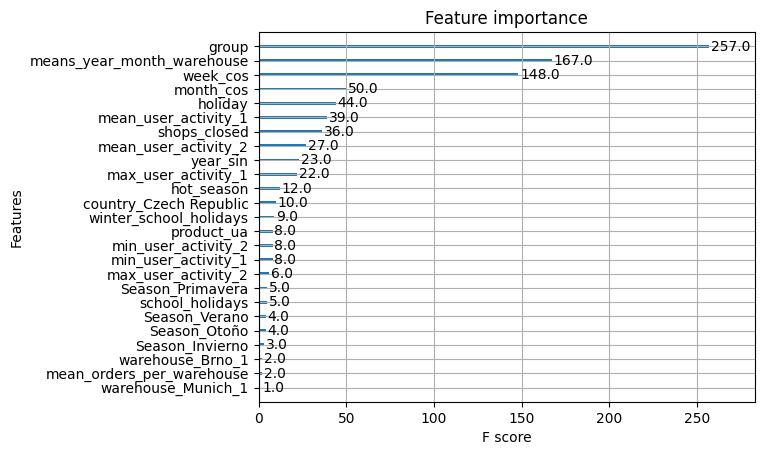

In [521]:
plot_importance(best_model)
plt.show()

In [522]:
y_val - pd.DataFrame(y_pred_xgboost, columns=['orders'])

,orders
0,-65.0
1,156.0
2,-225.0
3,228.0
4,55.0
...,...
1463,3196.0
1464,1641.0
1465,2842.0
1466,1920.0


## Redes Neuronales

In [523]:
# Escalar los datos
scaler = MinMaxScaler()
x_train_mmscaled = scaler.fit_transform(x_train)
x_val_mmscaled = scaler.transform(x_val)

Epoch 1/100
470/470 - 2s - loss: 71.7457 - val_loss: 19.7658 - 2s/epoch - 5ms/step
Epoch 2/100
470/470 - 1s - loss: 15.0635 - val_loss: 9.9292 - 1s/epoch - 3ms/step
Epoch 3/100
470/470 - 1s - loss: 10.8295 - val_loss: 8.4785 - 1s/epoch - 2ms/step
Epoch 4/100
470/470 - 1s - loss: 9.6854 - val_loss: 8.5444 - 1s/epoch - 3ms/step
Epoch 5/100
470/470 - 1s - loss: 9.2650 - val_loss: 8.5702 - 1s/epoch - 3ms/step
Epoch 6/100
470/470 - 1s - loss: 9.1024 - val_loss: 9.1344 - 1s/epoch - 2ms/step
Epoch 7/100
470/470 - 1s - loss: 9.0231 - val_loss: 8.9471 - 1s/epoch - 3ms/step
Epoch 8/100
470/470 - 1s - loss: 8.9925 - val_loss: 8.9352 - 1s/epoch - 3ms/step
Epoch 9/100
470/470 - 1s - loss: 8.9740 - val_loss: 8.8214 - 1s/epoch - 3ms/step
Epoch 10/100
470/470 - 1s - loss: 8.9366 - val_loss: 8.7533 - 1s/epoch - 2ms/step
Epoch 11/100
470/470 - 1s - loss: 8.9133 - val_loss: 8.8647 - 1s/epoch - 3ms/step
Epoch 12/100
470/470 - 1s - loss: 8.8752 - val_loss: 8.9399 - 1s/epoch - 3ms/step
Epoch 13/100
470/470 

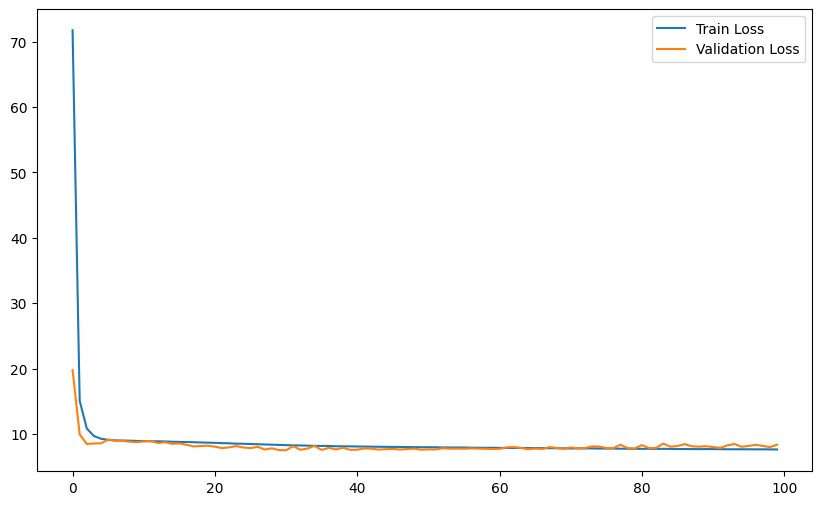

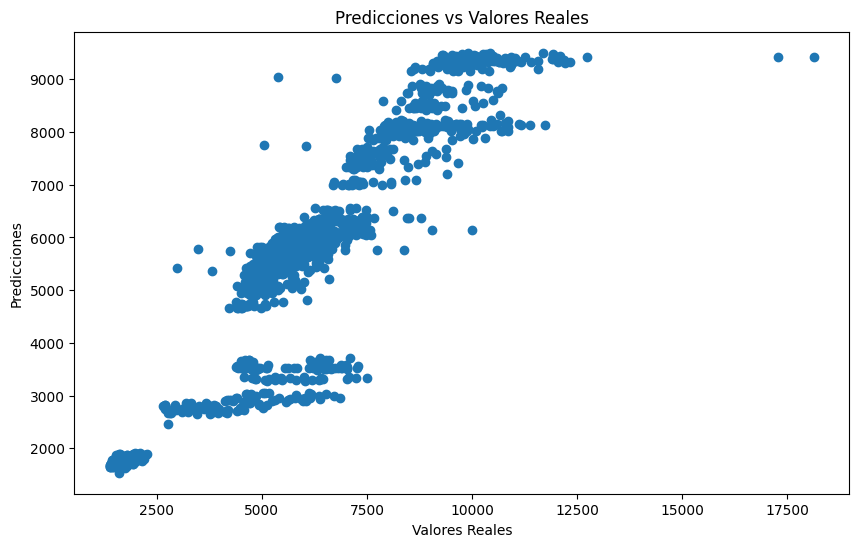

In [524]:
# Crear el modelo de red neuronal
model_nn = Sequential()
model_nn.add(Dense(64, input_dim=x_train_mmscaled.shape[1], activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1))

# Compilar el modelo
model_nn.compile(loss='mean_absolute_percentage_error', optimizer='adam')

# Entrenar el modelo
history = model_nn.fit(x_train_mmscaled, y_train, epochs=100, batch_size=10, verbose=2, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss = model_nn.evaluate(x_val_mmscaled, y_val, verbose=2)
print(f'Test Loss: {loss}')

# Hacer predicciones
y_pred_nn = model_nn.predict(x_val_mmscaled)

# Calcular el error
mape = mean_absolute_percentage_error(y_val, y_pred_nn)
print(f'Test MAPE: {mape}')

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Graficar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_nn)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

In [534]:
y_val - pd.DataFrame(y_pred_nn, columns=['orders'])

,orders
0,-21.397461
1,332.394531
2,-71.783081
3,410.746094
4,4.002930
...,...
1463,2601.795898
1464,602.477051
1465,2464.082031
1466,959.586914


## Modelo Stacking

In [526]:
scaler = StandardScaler()
x_train_sscaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_val_sscaled = pd.DataFrame(scaler.fit_transform(x_val), columns=x_val.columns)

In [527]:
x_train_sscaled

,holiday,shops_closed,winter_school_holidays,school_holidays,mean_user_activity_1,mean_user_activity_2,max_user_activity_1,max_user_activity_2,min_user_activity_1,min_user_activity_2,product_ua,mean_orders_per_warehouse,means_year_month_warehouse,country_Czech Republic,country_Germany,country_Hungary,warehouse_Brno_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,hot_season,year_sin,month_cos,week_cos,Season_Invierno,Season_Otoño,Season_Primavera,Season_Verano,group
0,-0.17423,-0.104973,-0.170035,-0.081769,0.032600,1.602980,0.097680,1.625902,-0.001716,1.397633,0.816130,1.489476,1.725893,0.714073,-0.465015,-0.436292,-0.445384,-0.285306,-0.337982,2.245251,-1.092849,-0.111755,1.455372,1.29036,1.676458,-0.489493,-0.628047,-0.594921,-1.889753
1,-0.17423,-0.104973,-0.170035,-0.081769,-0.442558,-0.228365,-0.603251,-0.248205,-0.402514,-0.022465,-0.544162,-0.200934,-0.052842,0.714073,-0.465015,-0.436292,-0.445384,-0.285306,-0.337982,-0.445384,-1.092849,-0.111755,1.455372,1.29036,1.676458,-0.489493,-0.628047,-0.594921,-1.889753
2,-0.17423,-0.104973,-0.170035,-0.081769,-0.888754,-0.488487,-1.043669,-0.567479,-0.826142,-0.196540,-0.930904,-0.410046,-0.258019,0.714073,-0.465015,-0.436292,-0.445384,-0.285306,-0.337982,-0.445384,-1.092849,-0.111755,1.455372,1.29036,1.676458,-0.489493,-0.628047,-0.594921,-1.889753
3,-0.17423,-0.104973,-0.170035,-0.081769,1.723384,-0.174572,1.735523,-0.238915,1.719434,-0.058632,0.978598,-0.004970,0.056045,-1.400418,-0.465015,2.292043,-0.445384,-0.285306,-0.337982,-0.445384,-1.092849,-0.111755,1.455372,1.29036,1.676458,-0.489493,-0.628047,-0.594921,-1.889753
4,-0.17423,-0.104973,-0.170035,-0.081769,0.868546,0.802646,0.857022,0.781054,0.862030,0.793044,1.156364,0.844171,0.984450,0.714073,-0.465015,-0.436292,2.245251,-0.285306,-0.337982,-0.445384,-1.092849,-0.111755,1.455372,1.29036,1.676458,-0.489493,-0.628047,-0.594921,-1.889753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,-0.17423,-0.104973,-0.170035,-0.081769,0.032600,1.602980,0.097680,1.625902,-0.001716,1.397633,0.816130,1.489476,0.990388,0.714073,-0.465015,-0.436292,-0.445384,-0.285306,-0.337982,2.245251,0.915039,0.215854,-0.633536,-1.15494,-0.596496,-0.489493,-0.628047,1.680895,1.643871
5868,-0.17423,-0.104973,-0.170035,-0.081769,1.723384,-0.174572,1.735523,-0.238915,1.719434,-0.058632,0.978598,-0.004970,-0.197718,-1.400418,-0.465015,2.292043,-0.445384,-0.285306,-0.337982,-0.445384,0.915039,0.215854,-0.633536,-1.15494,-0.596496,-0.489493,-0.628047,1.680895,1.643871
5869,-0.17423,-0.104973,-0.170035,-0.081769,-0.442558,-0.228365,-0.603251,-0.248205,-0.402514,-0.022465,-0.544162,-0.200934,-0.440952,0.714073,-0.465015,-0.436292,-0.445384,-0.285306,-0.337982,-0.445384,0.915039,0.215854,-0.633536,-1.15494,-0.596496,-0.489493,-0.628047,1.680895,1.643871
5870,-0.17423,-0.104973,-0.170035,-0.081769,-0.888754,-0.488487,-1.043669,-0.567479,-0.826142,-0.196540,-0.930904,-0.410046,-0.648812,0.714073,-0.465015,-0.436292,-0.445384,-0.285306,-0.337982,-0.445384,0.915039,0.215854,-0.633536,-1.06249,-0.596496,-0.489493,-0.628047,1.680895,1.671478


In [528]:


model1 = XGBRegressor(random_state=42)
model2 = LGBMRegressor(random_state=42)
model3 = MLPRegressor(random_state=42)
model4 = RandomForestRegressor(random_state=42)
model5 = ExtraTreesRegressor(random_state=42)
model6 = SVR()
model7 = DecisionTreeRegressor(random_state=42)
model8 = AdaBoostRegressor(random_state=42)
model9 = ElasticNet()
model10 = CatBoostRegressor(random_state=42)
meta_model = GradientBoostingRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_meta_features = np.zeros((x_train_sscaled.shape[0], 10))
test_meta_features = np.zeros((x_val_sscaled.shape[0], 10))

for train_index, val_index in kf.split(x_train_sscaled):
    X_train_fold, X_val_fold = x_train_sscaled.iloc[train_index], x_train_sscaled.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model1.fit(X_train_fold, y_train_fold)
    model2.fit(X_train_fold, y_train_fold)
    model3.fit(X_train_fold, y_train_fold)
    model4.fit(X_train_fold, y_train_fold)
    model5.fit(X_train_fold, y_train_fold)
    model6.fit(X_train_fold, y_train_fold)
    model7.fit(X_train_fold, y_train_fold)
    model8.fit(X_train_fold, y_train_fold)
    model9.fit(X_train_fold, y_train_fold)
    model10.fit(X_train_fold, y_train_fold)
    
    val_model1_pred = model1.predict(X_val_fold)
    val_model2_pred = model2.predict(X_val_fold)
    val_model3_pred = model3.predict(X_val_fold)
    val_model4_pred = model4.predict(X_val_fold)
    val_model5_pred = model5.predict(X_val_fold)
    val_model6_pred = model6.predict(X_val_fold)
    val_model7_pred = model7.predict(X_val_fold)
    val_model8_pred = model8.predict(X_val_fold)
    val_model9_pred = model9.predict(X_val_fold)
    val_model10_pred = model10.predict(X_val_fold)
    
    train_meta_features[val_index, 0] = val_model1_pred
    train_meta_features[val_index, 1] = val_model2_pred
    train_meta_features[val_index, 2] = val_model3_pred
    train_meta_features[val_index, 3] = val_model4_pred
    train_meta_features[val_index, 4] = val_model5_pred
    train_meta_features[val_index, 5] = val_model6_pred
    train_meta_features[val_index, 6] = val_model7_pred
    train_meta_features[val_index, 7] = val_model8_pred
    train_meta_features[val_index, 8] = val_model9_pred
    train_meta_features[val_index, 9] = val_model10_pred
    
    test_model1_pred = model1.predict(x_val_sscaled)
    test_model2_pred = model2.predict(x_val_sscaled)
    test_model3_pred = model3.predict(x_val_sscaled)
    test_model4_pred = model4.predict(x_val_sscaled)
    test_model5_pred = model5.predict(x_val_sscaled)
    test_model6_pred = model6.predict(x_val_sscaled)
    test_model7_pred = model7.predict(x_val_sscaled)
    test_model8_pred = model8.predict(x_val_sscaled)
    test_model9_pred = model9.predict(x_val_sscaled)
    test_model10_pred = model10.predict(x_val_sscaled)
    
    test_meta_features[:, 0] += test_model1_pred
    test_meta_features[:, 1] += test_model2_pred
    test_meta_features[:, 2] += test_model3_pred
    test_meta_features[:, 3] += test_model4_pred
    test_meta_features[:, 4] += test_model5_pred
    test_meta_features[:, 5] += test_model6_pred
    test_meta_features[:, 6] += test_model7_pred
    test_meta_features[:, 7] += test_model8_pred
    test_meta_features[:, 8] += test_model9_pred
    test_meta_features[:, 9] += test_model10_pred

test_meta_features /= kf.n_splits

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 4697, number of used features: 29
[LightGBM] [Info] Start training from score 5367.489887


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return 

Learning rate set to 0.052279
0:	learn: 1970.8478350	total: 12.4ms	remaining: 12.4s
1:	learn: 1880.2384866	total: 31.5ms	remaining: 15.7s
2:	learn: 1793.0328202	total: 41.7ms	remaining: 13.8s
3:	learn: 1711.1908770	total: 52.2ms	remaining: 13s
4:	learn: 1637.8474125	total: 53.7ms	remaining: 10.7s
5:	learn: 1566.8514903	total: 55.8ms	remaining: 9.24s
6:	learn: 1501.6161078	total: 58.9ms	remaining: 8.35s
7:	learn: 1434.7200389	total: 60.6ms	remaining: 7.52s
8:	learn: 1374.7429875	total: 62.1ms	remaining: 6.84s
9:	learn: 1314.5043374	total: 64.2ms	remaining: 6.35s
10:	learn: 1262.3792011	total: 65.9ms	remaining: 5.92s
11:	learn: 1210.6891849	total: 67.7ms	remaining: 5.58s
12:	learn: 1161.0230281	total: 69.5ms	remaining: 5.28s
13:	learn: 1116.5484999	total: 71.2ms	remaining: 5.02s
14:	learn: 1073.6615859	total: 73.6ms	remaining: 4.83s
15:	learn: 1031.7049554	total: 75.1ms	remaining: 4.62s
16:	learn: 993.9160609	total: 76.5ms	remaining: 4.42s
17:	learn: 960.8423698	total: 78.1ms	remaining: 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return 

Learning rate set to 0.052279
0:	learn: 1966.3136618	total: 8.3ms	remaining: 8.29s
1:	learn: 1878.8292846	total: 10.9ms	remaining: 5.42s
2:	learn: 1791.9529696	total: 13.5ms	remaining: 4.5s
3:	learn: 1710.4342475	total: 15.6ms	remaining: 3.88s
4:	learn: 1635.6267920	total: 17.6ms	remaining: 3.51s
5:	learn: 1565.0578184	total: 53.7ms	remaining: 8.89s
6:	learn: 1494.4985999	total: 63.8ms	remaining: 9.05s
7:	learn: 1428.4766579	total: 65.7ms	remaining: 8.15s
8:	learn: 1368.9445807	total: 67.7ms	remaining: 7.45s
9:	learn: 1310.0692958	total: 70.5ms	remaining: 6.98s
10:	learn: 1258.2098791	total: 72.9ms	remaining: 6.55s
11:	learn: 1206.9952447	total: 84.6ms	remaining: 6.96s
12:	learn: 1159.6967063	total: 88.6ms	remaining: 6.73s
13:	learn: 1115.3750714	total: 125ms	remaining: 8.78s
14:	learn: 1072.8876435	total: 145ms	remaining: 9.51s
15:	learn: 1031.3424483	total: 147ms	remaining: 9.07s
16:	learn: 993.0354674	total: 181ms	remaining: 10.5s
17:	learn: 960.4012436	total: 190ms	remaining: 10.4s

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return 

Learning rate set to 0.052281
0:	learn: 1960.1798379	total: 5.86ms	remaining: 5.86s
1:	learn: 1870.8858895	total: 9.03ms	remaining: 4.51s
2:	learn: 1784.6883285	total: 51.6ms	remaining: 17.1s
3:	learn: 1703.9778747	total: 56.1ms	remaining: 14s
4:	learn: 1629.1456908	total: 71.1ms	remaining: 14.1s
5:	learn: 1559.8754674	total: 74.3ms	remaining: 12.3s
6:	learn: 1490.3724195	total: 89.4ms	remaining: 12.7s
7:	learn: 1424.3133012	total: 94.7ms	remaining: 11.7s
8:	learn: 1364.2910037	total: 97.7ms	remaining: 10.8s
9:	learn: 1306.8431780	total: 100ms	remaining: 9.91s
10:	learn: 1254.9607466	total: 104ms	remaining: 9.35s
11:	learn: 1203.5548105	total: 108ms	remaining: 8.88s
12:	learn: 1154.8148470	total: 114ms	remaining: 8.62s
13:	learn: 1108.1905591	total: 119ms	remaining: 8.42s
14:	learn: 1065.4346832	total: 123ms	remaining: 8.05s
15:	learn: 1024.9901645	total: 125ms	remaining: 7.7s
16:	learn: 988.4024558	total: 127ms	remaining: 7.37s
17:	learn: 955.5121197	total: 130ms	remaining: 7.1s
18:	l

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return 

Learning rate set to 0.052281
0:	learn: 1950.2647977	total: 21ms	remaining: 21s
1:	learn: 1860.4530634	total: 38ms	remaining: 19s
2:	learn: 1774.1846510	total: 41.7ms	remaining: 13.9s
3:	learn: 1693.2501301	total: 50.6ms	remaining: 12.6s
4:	learn: 1618.8395627	total: 53ms	remaining: 10.5s
5:	learn: 1549.7689978	total: 54.6ms	remaining: 9.04s
6:	learn: 1480.1423866	total: 56.1ms	remaining: 7.95s
7:	learn: 1413.9823777	total: 57.7ms	remaining: 7.16s
8:	learn: 1351.9232655	total: 59.5ms	remaining: 6.56s
9:	learn: 1294.2692653	total: 61.1ms	remaining: 6.05s
10:	learn: 1242.2441896	total: 63.9ms	remaining: 5.75s
11:	learn: 1190.7623006	total: 65.8ms	remaining: 5.42s
12:	learn: 1141.8820066	total: 67.7ms	remaining: 5.14s
13:	learn: 1095.1165593	total: 69.6ms	remaining: 4.9s
14:	learn: 1052.2210179	total: 72.8ms	remaining: 4.78s
15:	learn: 1011.5029866	total: 74.4ms	remaining: 4.57s
16:	learn: 974.0480545	total: 76ms	remaining: 4.39s
17:	learn: 940.0743589	total: 77.8ms	remaining: 4.24s
18:	l

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return 

Learning rate set to 0.052281
0:	learn: 1972.5839249	total: 61.7ms	remaining: 1m 1s
1:	learn: 1882.1316055	total: 93.2ms	remaining: 46.5s
2:	learn: 1795.0207047	total: 107ms	remaining: 35.6s
3:	learn: 1713.3550483	total: 130ms	remaining: 32.3s
4:	learn: 1640.1906498	total: 152ms	remaining: 30.2s
5:	learn: 1569.2567569	total: 154ms	remaining: 25.5s
6:	learn: 1504.1982990	total: 157ms	remaining: 22.2s
7:	learn: 1437.2687446	total: 159ms	remaining: 19.7s
8:	learn: 1374.8534455	total: 161ms	remaining: 17.7s
9:	learn: 1316.7848476	total: 163ms	remaining: 16.1s
10:	learn: 1265.1641216	total: 165ms	remaining: 14.8s
11:	learn: 1213.5676045	total: 167ms	remaining: 13.7s
12:	learn: 1165.7773528	total: 168ms	remaining: 12.8s
13:	learn: 1120.6482547	total: 173ms	remaining: 12.2s
14:	learn: 1079.5977549	total: 177ms	remaining: 11.6s
15:	learn: 1040.7278959	total: 179ms	remaining: 11s
16:	learn: 1001.0422679	total: 193ms	remaining: 11.2s
17:	learn: 966.4266913	total: 196ms	remaining: 10.7s
18:	learn

In [529]:
meta_model.fit(train_meta_features, y_train)

final_pred = meta_model.predict(test_meta_features)

mape = mean_absolute_percentage_error(y_val, final_pred)
print(f'Final Model MAPE: {mape:.4f}')

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Final Model MAPE: 0.1988


In [530]:
y_val - pd.DataFrame(final_pred, columns=['orders'])

,orders
0,523.672495
1,1160.322659
2,-1184.339191
3,1549.452124
4,928.066543
...,...
1463,3018.049942
1464,1166.848030
1465,3267.474463
1466,1315.311014


## Arbol de Regresión

In [969]:
# Spits que respeten la proporción de las clases
kfoldcv = KFold(n_splits=10, shuffle=True, random_state=42)
 
#Creo nuevo arbol
arbolcv=DecisionTreeRegressor()

#Selecciono métrica F1-Score
scorer_fn = make_scorer(mean_squared_error)

#Hago CV
results = cross_validate(arbolcv, df_final_train, df_final_train_label, cv = kfoldcv, scoring = scorer_fn, return_estimator=True)

In [970]:
metricsCV = results['test_score']
best_performance = results['estimator'][np.where(metricsCV == min(metricsCV))[0][0]]
print(metricsCV)

[414257.12032313 372190.88137755 445653.         386583.79386712
 370490.44804089 355312.03449744 557169.28577513 465146.18483816
 441527.6971891  493342.73059814]


In [971]:
#Importancia y reglas del Árbol con mejor Performance
sorted(list(zip(df_final_train.columns.to_list(), best_performance.feature_importances_)), key=lambda x: -x[1])[0:10]      

[('user_activity_2', 0.7529853269664103),
 ('mean_orders_per_warehouse', 0.22695404099355954),
 ('week_cos', 0.01049434550843329),
 ('means_year_month_warehouse', 0.007265809833702479),
 ('max_user_activity_2', 0.000428996777063203),
 ('product_ua', 0.00042753552123674847),
 ('min_user_activity_1', 0.00036278385126870606),
 ('mean_user_activity_2', 0.00029440676722298836),
 ('min_user_activity_2', 0.0002008264994900849),
 ('mean_user_activity_1', 0.0001972113294091473)]

In [972]:
#Predicción sobre el set de evaluacion
y_pred = np.round(best_performance.predict(df_final_validation))

In [973]:
# Evaluar el rendimiento del modelo
mse = mean_squared_error(df_final_validation_label, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1949105.15


In [974]:
mape = mean_absolute_percentage_error(df_final_validation_label, y_pred)
print(f'Mean Squared Error: {mape:.4f}')

Mean Squared Error: 0.1680


## Train for Warehouse

In [ ]:
df_final_train

In [ ]:
df_final_validation

In [ ]:
warehouses.value_counts()

In [ ]:
warehouses.value_counts()

In [ ]:
unique_warehouses = list(warehouses.unique())
models_warehouses = {}

In [ ]:
df_final_train = df_final_train.drop(["warehouse_Frankfurt_1", "warehouse_Munich_1", "country_Germany", "country_Czech Republic"], axis = 1)
df_final_validation = df_final_validation.drop(["warehouse_Frankfurt_1", "warehouse_Munich_1", "country_Germany", "country_Czech Republic"], axis = 1)

In [ ]:
df_final_train.count()

In [ ]:
# Escalar los datos
unique_warehouses = list(warehouses.unique())
scaler = MinMaxScaler()

df_final_train['warehouse'] = warehouses
df_final_train["orders"] = df_final_train_label
for warehouse in unique_warehouses:
   df_with_unique_warehouse = df_final_train[df_final_train.warehouse == warehouse].drop(['warehouse'], axis = 1)
   df_with_unique_warehouse_label = df_with_unique_warehouse.orders
   df_with_unique_warehouse = df_with_unique_warehouse.drop(['orders'], axis = 1)
   if df_with_unique_warehouse.size == 0:
      if warehouse == 'Budapest_1':
         print("ACA ENTRO BUDAPEST")
      continue
   df_train_scaled_with_unique_warehouse = scaler.fit_transform(df_with_unique_warehouse)
   # Crear el modelo de red neuronal
   model_nn = Sequential()
   model_nn.add(Dense(64, input_dim=df_train_scaled_with_unique_warehouse.shape[1], activation='relu'))
   model_nn.add(Dense(32, activation='relu'))
   model_nn.add(Dense(1))

   # Compilar el modelo
   model_nn.compile(loss='mean_absolute_percentage_error', optimizer='adam')

   # Entrenar el modelo
   history = model_nn.fit(df_train_scaled_with_unique_warehouse, df_with_unique_warehouse_label, epochs=100, batch_size=10, verbose=2, validation_split=0.2)
   models_warehouses[warehouse] = model_nn
   
   

In [ ]:
unique_warehouses

In [ ]:
models_warehouses

In [ ]:
results = pd.Series(dtype='float64')

global cont
cont = 0
def predict_by_warehouse(row):
    warehouse = warehouses_validation.iloc[row.name]
    
    model = models_warehouses[warehouse]

    scaled_row = scaler.fit_transform(row.values.reshape(1, -1))
    result = model.predict(scaled_row)

    results.loc[len(results)] = result




In [ ]:
df_final_validation.apply(predict_by_warehouse, axis=1)

In [ ]:
mape = mean_absolute_percentage_error(df_final_validation_label, results)
print(f'Test MAPE: {mape}')

## Voting

In [154]:
best_params_xgb = {
    'n_estimators': 447,
    'max_depth': 6,
    'min_child_weight': 8,
    'gamma': 3.78,
    'colsample_bytree': 1.0
}

best_params_lgb = {
    'num_leaves': 33,
    'max_depth': 30,
    'learning_rate': 0.3,
    'n_estimators': 459,
    'colsample_bytree': 1.0
}

best_params_rf = {
    'n_estimators': 439,
    'max_depth': 25,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 1.0
}

xgb_model = xgb.XGBRegressor(
    n_estimators=best_params_xgb['n_estimators'],
    max_depth=best_params_xgb['max_depth'],
    min_child_weight=best_params_xgb['min_child_weight'],
    gamma=best_params_xgb['gamma'],
    colsample_bytree=best_params_xgb['colsample_bytree'],
    random_state=1
)

lgb_model = lgb.LGBMRegressor(
    num_leaves=best_params_lgb['num_leaves'],
    max_depth=best_params_lgb['max_depth'],
    learning_rate=best_params_lgb['learning_rate'],
    n_estimators=best_params_lgb['n_estimators'],
    colsample_bytree=best_params_lgb['colsample_bytree'],
    random_state=1
)

rf_model = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    max_features=best_params_rf['max_features'],
    random_state=1
)

voting_regressor = VotingRegressor(estimators=[
    ('xgb', xgb_model),
    ('lgb', lgb_model),
    ('rf', rf_model)
])


voting_regressor.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_voting.py:604: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Number of data points in the train set: 5872, number of used features: 10
[LightGBM] [Info] Start training from score 5372.176260


VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=1.0, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=3.78, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=6,
                                          max_leaves=None, min_child_weight=8,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=447,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=1, ...)),
                            ('lgb',
                             LGBMRegressor(learning_rate=0.3, max_depth=30,
                                           n_estimators=459, num_leaves=33,
                                           random_state=1)),
                            ('rf',
                             RandomForestRegressor(max_depth=25,
                                                   n_estimators=439,
                                                   random_state=1))])

In [155]:
y_pred_voting = voting_regressor.predict(x_val)

In [157]:
mape = mean_absolute_percentage_error(y_val, y_pred_voting)
print(f'Test MAPE: {mape}')

Test MAPE: 0.17107173912678522


## Submission

In [ ]:
# Generamos un dataframe del dataset de entrenamiento
test =  pd.read_csv('test.csv')
test

In [ ]:
test['date'] = pd.to_datetime(test['date'])
test["mean_user_activity_1"] = test.warehouse.apply(lambda x: means_ua1.get(x, PROMEDIO_UA1))
test["mean_user_activity_2"] = test.warehouse.apply(lambda x: means_ua2.get(x, PROMEDIO_UA2))
test["max_user_activity_1"] = test.warehouse.apply(lambda x: max_ua1.get(x, PROMEDIO_UA1))
test["max_user_activity_2"] = test.warehouse.apply(lambda x: max_ua2.get(x, PROMEDIO_UA2))
test["min_user_activity_1"] = test.warehouse.apply(lambda x: min_ua1.get(x, PROMEDIO_UA1))
test["min_user_activity_2"] = test.warehouse.apply(lambda x: min_ua2.get(x, PROMEDIO_UA2))
test["product_ua"] = test["mean_user_activity_1"] * test["mean_user_activity_2"]
# test["mean_orders_per_warehouse"] = test.warehouse.apply(lambda x: means_orders_per_warehouse.get(x, PROMEDIO_OPW))

#Mean encoding
test["mean_orders_per_warehouse"] = test.warehouse.apply(lambda x: means_orders_per_warehouse.get(x, PROMEDIO_OPW))
test['year_month_warehouse'] = test['date'].dt.month.astype(str) + '_' + test['warehouse']
test["means_year_month_warehouse"] = test.year_month_warehouse.apply(lambda x: means_y_m_w.get(x, PROMEDIO_YMW))

test['country'] = test['warehouse'].map(city_to_country)
test = pd.concat([test.drop(["country"], axis=1), pd.get_dummies(test.country).astype('int').add_prefix('country_')], axis=1)
test = pd.concat([test.drop(["warehouse"], axis=1), pd.get_dummies(test.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
test = test.drop(["warehouse_Budapest_1", "warehouse_Prague_2", "warehouse_Prague_3"], axis=1)
test['hot_season'] = test.date.apply(lambda x: 1 if 2 < x.month < 9 else 0)

test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['week'] = test['date'].dt.isocalendar().week
test['day'] = test['date'].dt.day
test['day_of_week'] = test['date'].dt.dayofweek #numero
# test['day_of_week'] = test['date'].dt.day_name() #cadena
test['year_sin'] = np.sin(2 * np.pi * test['year'])
test['year_cos'] = np.cos(2 * np.pi * test['year'])
test['month_sin'] = np.sin(2 * np.pi * test['month'] / 12) 
test['month_cos'] = np.cos(2 * np.pi * test['month'] / 12)
test['week_sin'] = np.sin(2 * np.pi * test['week'] / 53)
test['week_cos'] = np.cos(2 * np.pi * test['week'] / 53)
test['day_sin'] = np.sin(2 * np.pi * test['day'] / 31)
test['day_cos'] = np.cos(2 * np.pi * test['day'] / 31)
test['day_of_week_sin'] = np.sin(2 * np.pi * test['day_of_week'] / 7)
test['day_of_week_cos'] = np.cos(2 * np.pi * test['day_of_week'] / 7)
test["month_name"] = test.date.dt.month_name()
test['season'] = test.month_name.apply(get_season)
test = pd.concat([test, pd.get_dummies(test.season).astype('int').add_prefix('Season_')], axis=1) # tiene solo primavera
test['Season_Invierno'] = 0
test['Season_Verano'] = 0

test['group']=(test['year']-2020)*48+test['month']*4+test['day']//7

test = test.drop(['date', 'year', 'month', 'week', 'day', 'day_of_week', 'month_name', 'season', 'holiday_name', 'year_month_warehouse'], axis = 1)
test = test.reset_index().drop(["index"], axis = 1)

test.info()

In [ ]:
ids = test.id
test = test.drop(["id"], axis=1)

In [ ]:
df_final_train.columns

In [ ]:
test = test[df_final_train.columns]

In [ ]:
test

In [ ]:
model1 = XGBRegressor(random_state=42)
model2 = LGBMRegressor(random_state=42)
model3 = MLPRegressor(random_state=42)
model4 = RandomForestRegressor(random_state=42)
model5 = ExtraTreesRegressor(random_state=42)
model6 = SVR()
model7 = DecisionTreeRegressor(random_state=42)
model8 = AdaBoostRegressor(random_state=42)
model9 = ElasticNet()
model10 = CatBoostRegressor(random_state=42)
meta_model = GradientBoostingRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_meta_features = np.zeros((df_final_train.shape[0], 10))
test_meta_features = np.zeros((test.shape[0], 10))

for train_index, val_index in kf.split(df_final_train):
    X_train_fold, X_val_fold = df_final_train.iloc[train_index], df_final_train.iloc[val_index]
    y_train_fold, y_val_fold = df_final_train_label.iloc[train_index], df_final_train_label.iloc[val_index]

    model1.fit(X_train_fold, y_train_fold)
    model2.fit(X_train_fold, y_train_fold)
    model3.fit(X_train_fold, y_train_fold)
    model4.fit(X_train_fold, y_train_fold)
    model5.fit(X_train_fold, y_train_fold)
    model6.fit(X_train_fold, y_train_fold)
    model7.fit(X_train_fold, y_train_fold)
    model8.fit(X_train_fold, y_train_fold)
    model9.fit(X_train_fold, y_train_fold)
    model10.fit(X_train_fold, y_train_fold)
    
    val_model1_pred = model1.predict(X_val_fold)
    val_model2_pred = model2.predict(X_val_fold)
    val_model3_pred = model3.predict(X_val_fold)
    val_model4_pred = model4.predict(X_val_fold)
    val_model5_pred = model5.predict(X_val_fold)
    val_model6_pred = model6.predict(X_val_fold)
    val_model7_pred = model7.predict(X_val_fold)
    val_model8_pred = model8.predict(X_val_fold)
    val_model9_pred = model9.predict(X_val_fold)
    val_model10_pred = model10.predict(X_val_fold)
    
    train_meta_features[val_index, 0] = val_model1_pred
    train_meta_features[val_index, 1] = val_model2_pred
    train_meta_features[val_index, 2] = val_model3_pred
    train_meta_features[val_index, 3] = val_model4_pred
    train_meta_features[val_index, 4] = val_model5_pred
    train_meta_features[val_index, 5] = val_model6_pred
    train_meta_features[val_index, 6] = val_model7_pred
    train_meta_features[val_index, 7] = val_model8_pred
    train_meta_features[val_index, 8] = val_model9_pred
    train_meta_features[val_index, 9] = val_model10_pred
    
    test_model1_pred = model1.predict(test)
    test_model2_pred = model2.predict(test)
    test_model3_pred = model3.predict(test)
    test_model4_pred = model4.predict(test)
    test_model5_pred = model5.predict(test)
    test_model6_pred = model6.predict(test)
    test_model7_pred = model7.predict(test)
    test_model8_pred = model8.predict(test)
    test_model9_pred = model9.predict(test)
    test_model10_pred = model10.predict(test)
    
    test_meta_features[:, 0] += test_model1_pred
    test_meta_features[:, 1] += test_model2_pred
    test_meta_features[:, 2] += test_model3_pred
    test_meta_features[:, 3] += test_model4_pred
    test_meta_features[:, 4] += test_model5_pred
    test_meta_features[:, 5] += test_model6_pred
    test_meta_features[:, 6] += test_model7_pred
    test_meta_features[:, 7] += test_model8_pred
    test_meta_features[:, 8] += test_model9_pred
    test_meta_features[:, 9] += test_model10_pred

test_meta_features /= kf.n_splits

In [ ]:
meta_model.fit(train_meta_features, df_final_train_label)

final_pred = meta_model.predict(test_meta_features)

In [ ]:
meta_model.fit(train_meta_features, df_final_train_label)

final_pred = meta_model.predict(test_meta_features)

In [ ]:
# Redes Neuronales
test_scaled = scaler.transform(test)
final_pred = [value[0] for value in model_nn.predict(test_scaled)]

In [ ]:
list(final_pred)

In [ ]:
sub = pd.DataFrame({
    'id': ids,
    'orders': final_pred
})

In [ ]:
sub

In [ ]:
# Escribir el DataFrame a un archivo CSV
sub.to_csv('submission_nn.csv', index=False)
